Final paper project <br>


# Load libraries and data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
dc = pd.read_csv('./data/covid_democracy.csv')
dc.head()
#dataset organized with one row per country, columns with information about regime type and excess deaths during covid

,country_name,country_text_id,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,deaths_late,deaths_mid,deaths_early,deaths_sum,gdppc,population,dem_cat
0,Mexico,MEX,2020,0.645,0.407,0.385,0.359,0.363,0.000075,0.000295,0.000212,0.000582,16494.08,130262220,middle
1,Suriname,SUR,2020,0.737,0.595,0.453,0.600,0.537,0.000161,0.000023,0.000023,0.000207,NaN,591798,democracy
2,Sweden,SWE,2020,0.905,0.873,0.649,0.842,0.815,-0.000004,0.000059,0.000091,0.000146,45541.89,10160159,democracy
3,Switzerland,CHE,2020,0.892,0.847,0.787,0.855,0.825,-0.000008,0.000137,0.000034,0.000163,61372.73,8715494,democracy
4,Ghana,GHA,2020,0.698,0.596,0.348,0.582,0.517,0.000022,-0.000004,-0.000015,0.000003,4267.07,31732128,democracy


In [3]:
dc.info()
#data is mostly complete - only 12 nulls in gdppc column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     175 non-null    object 
 1   country_text_id  175 non-null    object 
 2   year             175 non-null    int64  
 3   v2x_polyarchy    175 non-null    float64
 4   v2x_libdem       175 non-null    float64
 5   v2x_partipdem    175 non-null    float64
 6   v2x_delibdem     175 non-null    float64
 7   v2x_egaldem      175 non-null    float64
 8   deaths_late      175 non-null    float64
 9   deaths_mid       175 non-null    float64
 10  deaths_early     175 non-null    float64
 11  deaths_sum       175 non-null    float64
 12  gdppc            163 non-null    float64
 13  population       175 non-null    int64  
 14  dem_cat          175 non-null    object 
dtypes: float64(10), int64(2), object(3)
memory usage: 20.6+ KB


In [4]:
len(dc)
#data includes 175 countries

175

In [5]:
dc.describe()
#average democracy ('v2x_polyarchy') is 0.52
#average excess deaths ('deaths_sum') is .00024 per capita

,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,deaths_late,deaths_mid,deaths_early,deaths_sum,gdppc,population
count,175.0,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,163.000000,1.750000e+02
mean,2020.0,0.518629,0.402794,0.333754,0.400023,0.389143,0.000107,0.000093,0.000041,0.000242,18973.506687,4.493478e+07
std,0.0,0.253082,0.258172,0.195411,0.245343,0.234457,0.000089,0.000101,0.000067,0.000205,20443.439008,1.561523e+08
min,2020.0,0.016000,0.012000,0.010000,0.013000,0.028000,-0.000014,-0.000061,-0.000146,-0.000096,623.490000,9.891000e+04
25%,2020.0,0.292500,0.168500,0.162500,0.214000,0.189500,0.000033,0.000021,-0.000002,0.000087,4183.160000,4.001899e+06
50%,2020.0,0.536000,0.368000,0.333000,0.364000,0.337000,0.000087,0.000067,0.000026,0.000190,12165.790000,1.026902e+07
75%,2020.0,0.751000,0.640500,0.475000,0.600000,0.575500,0.000163,0.000127,0.000066,0.000391,27277.485000,3.306780e+07
max,2020.0,0.910000,0.878000,0.787000,0.871000,0.870000,0.000412,0.000412,0.000328,0.000836,153764.160000,1.444216e+09


# Exploratory data analysis

In [6]:
dc.groupby(['dem_cat'])['deaths_sum'].mean()
#democracies have fewest deaths and autocracies have most, 
# before considering any confounding variables

dem_cat
autocracy    0.000274
democracy    0.000210
middle       0.000244
Name: deaths_sum, dtype: float64

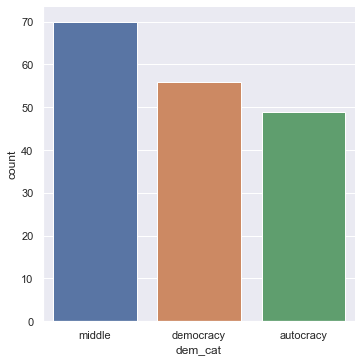

In [7]:
sns.factorplot('dem_cat', data=dc, kind='count')
#many countries in middle zone between democracy and autocracy

<AxesSubplot:ylabel='Density'>

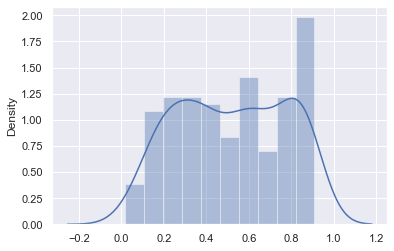

In [8]:
sns.distplot(x=dc['v2x_polyarchy'], bins = 10)

<AxesSubplot:xlabel='deaths_sum', ylabel='dem_cat'>

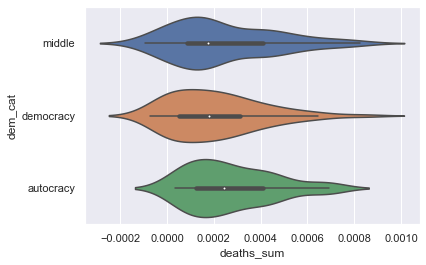

In [9]:
sns.violinplot(x=dc['deaths_sum'], y=dc['dem_cat'])

<AxesSubplot:xlabel='dem_cat', ylabel='deaths_sum'>

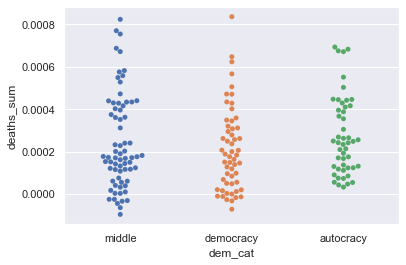

In [10]:
sns.swarmplot(x=dc['dem_cat'], y=dc['deaths_sum'])

<AxesSubplot:xlabel='dem_cat', ylabel='deaths_late'>

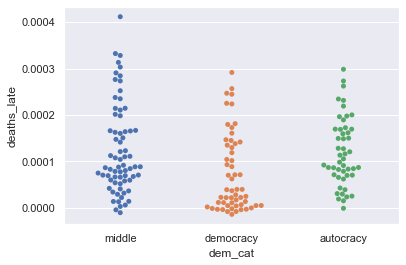

In [11]:
sns.swarmplot(x=dc['dem_cat'], y=dc['deaths_late'])

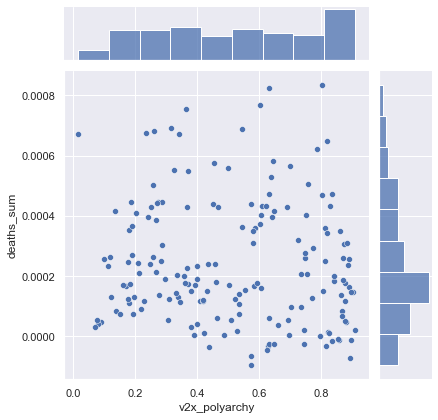

In [12]:
sns.jointplot(x=dc['v2x_polyarchy'], y=dc['deaths_sum'], kind = 'scatter')

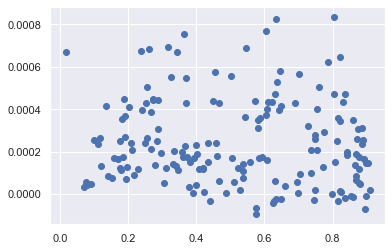

In [13]:
plt.scatter(dc['v2x_polyarchy'], dc['deaths_sum'])

## Linear Regressions

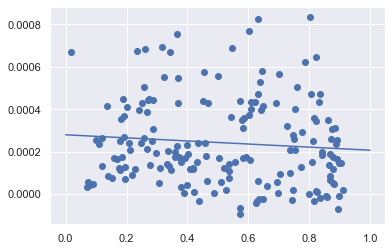

In [14]:
#plot linear model across scatterplot
model = LinearRegression(fit_intercept=True)
model.fit(dc['v2x_polyarchy'][:, np.newaxis], dc['deaths_sum'])

xfit = np.linspace(0, 1, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(dc['v2x_polyarchy'], dc['deaths_sum'])
plt.plot(xfit, yfit);

In [31]:
#choose independent variables
dc_nonulls = dc.dropna(how='any',axis=0) 
x = dc_nonulls[['v2x_polyarchy','gdppc']].copy()
#choose the dependent variable
y = dc_nonulls['deaths_sum']

In [32]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 174
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v2x_polyarchy  163 non-null    float64
 1   gdppc          163 non-null    float64
dtypes: float64(2)
memory usage: 3.8 KB


In [33]:
model.fit(x,y)
print(model.intercept_)
print(model.coef_)
sm.OLS(y,x).fit().summary() 
#both degree of democracy and gdp per capita predict fewer deaths during entirety of pandemic

0.000299625169934828
[-5.74759531e-05 -9.19882640e-10]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             deaths_sum   R-squared (uncentered):                   0.447
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                              65.11
Date:                Tue, 02 Nov 2021   Prob (F-statistic):                    1.91e-21
Time:                        20:30:50   Log-Likelihood:                          1125.6
No. Observations:                 163   AIC:                                     -2247.
Df Residuals:                     161   BIC:                                     -2241.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
v2x_polyarchy     0.0004   4.61e-05      8.016      0.000       0.000       0.000
gdppc          1.854e-10   9.61e-10      0.193      0.847   -1.71e-09    2.08e-09
==============================================================================
Omnibus:                        4.110   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                4.058
Skew:                           0.344   Prob(JB):                        0.131
Kurtosis:                       2.648   Cond. No.                     6.72e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
x = dc_nonulls[['v2x_polyarchy','gdppc']].copy()
y = dc_nonulls['deaths_early']
model.fit(x,y)
print(model.intercept_)
print(model.coef_)
sm.OLS(y,x).fit().summary()
#democracy correlates with fewer deaths in early period of pandemic
#high gdp per capita predicted more deaths in early period of pandemic

6.0495538222983776e-05
[-4.42478676e-05  3.39298164e-10]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           deaths_early   R-squared (uncentered):                   0.209
Model:                            OLS   Adj. R-squared (uncentered):              0.199
Method:                 Least Squares   F-statistic:                              21.23
Date:                Tue, 02 Nov 2021   Prob (F-statistic):                    6.58e-09
Time:                        20:24:20   Log-Likelihood:                          1323.3
No. Observations:                 163   AIC:                                     -2643.
Df Residuals:                     161   BIC:                                     -2636.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
v2x_polyarchy  4.195e-05   1.37e-05      3.060      0.003    1.49e-05     6.9e-05
gdppc          5.625e-10   2.86e-10      1.968      0.051   -1.85e-12    1.13e-09
==============================================================================
Omnibus:                       46.424   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.622
Skew:                           1.269   Prob(JB):                     3.84e-22
Kurtosis:                       5.843   Cond. No.                     6.72e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
x = dc_nonulls[['v2x_polyarchy','gdppc']].copy()
y = dc_nonulls['deaths_late']
model.fit(x,y)
print(model.intercept_)
print(model.coef_)
sm.OLS(y,x).fit().summary()
#democracy correlates with fewer deaths in late period of pandemic
#high gdp per capita predicted far fewer deaths in late period of pandemic

0.00015450329753791066
[-5.07766858e-05 -9.73747943e-10]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            deaths_late   R-squared (uncentered):                   0.409
Model:                            OLS   Adj. R-squared (uncentered):              0.401
Method:                 Least Squares   F-statistic:                              55.60
Date:                Tue, 02 Nov 2021   Prob (F-statistic):                    4.37e-19
Time:                        20:24:34   Log-Likelihood:                          1255.6
No. Observations:                 163   AIC:                                     -2507.
Df Residuals:                     161   BIC:                                     -2501.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
v2x_polyarchy     0.0002   2.08e-05      8.157      0.000       0.000       0.000
gdppc         -4.038e-10   4.33e-10     -0.933      0.352   -1.26e-09    4.51e-10
==============================================================================
Omnibus:                        4.199   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                4.053
Skew:                           0.334   Prob(JB):                        0.132
Kurtosis:                       2.613   Cond. No.                     6.72e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

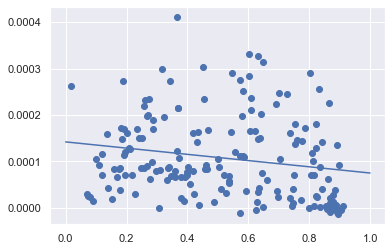

In [20]:
#plot linear model across scatterplot
#switch y axis to deaths_late
# shows steeper line

model = LinearRegression(fit_intercept=True)
model.fit(dc['v2x_polyarchy'][:, np.newaxis], dc['deaths_late'])

xfit = np.linspace(0, 1, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(dc['v2x_polyarchy'], dc['deaths_late'])
plt.plot(xfit, yfit);

to do:
* reverse engineer database merge
* linear models of death ~ polyarchy
* plots

